In [111]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

#### Using resampled dataset so that ratio of targets is equal

In [2]:
file = '../Resampling/FCV_Oversampled.csv'
df = pd.read_csv(file)

df

,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),Home Type (detached 1),Highest Level of Education,Longest trip in the last 12 months,...,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,Target,Model Year,Manufacturer,Model
0,0,0,0,0,125000.0,-2,1,1,3,571.75,...,15.58,2,55,0,3,10992,1.0,2013,4,4
1,0,0,1,0,225000.0,1,1,1,4,120.40,...,2.19,2,55,0,2,5714,1.0,2014,1,13
2,0,0,0,0,375000.0,2,1,1,3,407.45,...,40.95,5,45,0,2,16800,1.0,2013,9,6
3,0,0,1,0,275000.0,2,1,1,4,123.65,...,3.04,3,45,0,2,6000,1.0,2012,9,6
4,0,0,0,0,125000.0,0,1,1,4,289.51,...,47.75,2,65,0,2,14250,1.0,2014,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629,0,0,1,0,275000.0,2,1,1,4,568.09,...,10.69,3,65,0,3,9197,0.0,2016,12,7
6630,0,0,1,0,225000.0,2,0,0,4,788.46,...,24.94,2,35,0,3,12800,0.0,2015,5,14
6631,0,0,0,0,225000.0,0,1,1,4,395.48,...,33.58,4,55,0,2,21600,0.0,2017,12,7
6632,0,0,0,0,75000.0,0,1,0,2,447.83,...,4.52,2,65,0,2,14880,0.0,2017,4,3


In [58]:
df['Target'].value_counts()

1.0    3317
0.0    3317
Name: Target, dtype: int64

#### Value counts in target column are equal, showing equal distribution of target values

In [99]:
ml_df = df.copy()

In [100]:
# Seperate training data from target column

X = ml_df.drop(columns=('Target'), axis = 1)
y = ml_df['Target']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [102]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [103]:
# Create the SVM model
svm = SVC(kernel='linear')

In [104]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [105]:
# Generate dataframe of actual vs prediction

y_pred = svm.predict(X_test_scaled)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test,
}).reset_index(drop=True)
results

,Prediction,Actual
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
1986,0.0,0.0
1987,1.0,0.0
1988,1.0,1.0
1989,1.0,1.0


In [106]:
# Evaluate the model
ovr_accuracy_score = accuracy_score(y_test, y_pred)
ovr_accuracy_score

0.8427925665494727

In [107]:
svm_accuracy = get_accuracy_score(svm)
svm_accuracy

[0.8432048244669395, 0.8427925665494727]

In [108]:
svm_recall = get_recall_score(svm)
svm_recall

[0.8288444830582102, 0.8325123152709359]

In [109]:
svm_precision = get_precision_score(svm)
svm_precision

[0.8510258697591436, 0.8552631578947368]

In [12]:
# Stealing Christy's metric score function ;)
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['BEV (0)', 'FCV (1)'], yticklabels=['BEV (0)', 'FCV (1)'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       976
         1.0       0.86      0.83      0.84      1015

    accuracy                           0.84      1991
   macro avg       0.84      0.84      0.84      1991
weighted avg       0.84      0.84      0.84      1991



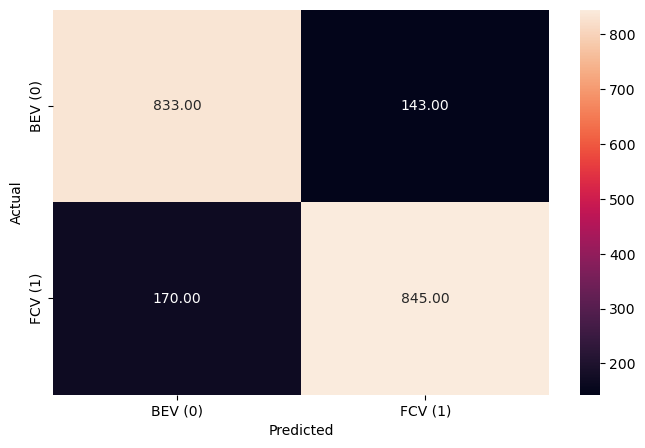

In [13]:
metrics_score(y_test, y_pred)

In [14]:
# Calculate feature importance on SVM Model

coef = svm.coef_
feature_importance = np.abs(coef)

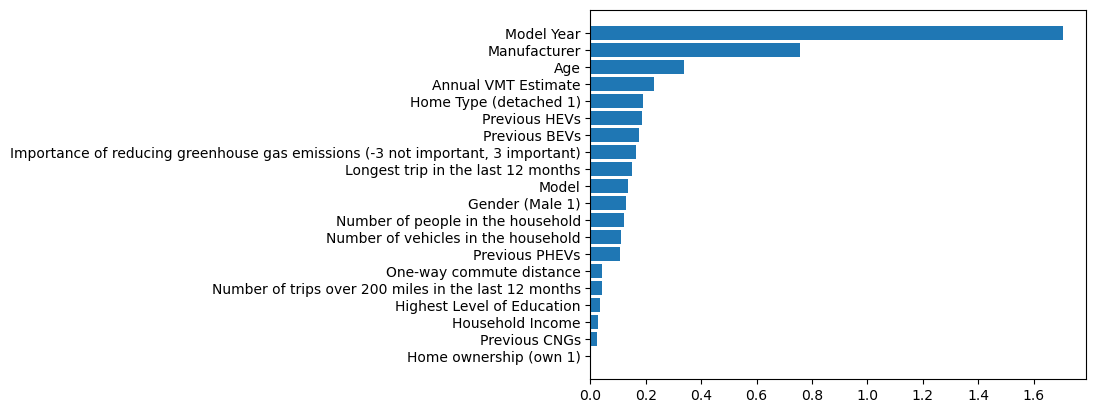

In [15]:
# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

# Tuning the SVM Model:
### - The above results were done with no tuning so perhaps using GridSearch to find optimal hyperparameters will yield better results

In [77]:
param_grid = {'C': [0.1,1], 'gamma': [10,5,1],'kernel': ['rbf', 'linear']}

In [78]:
grid = GridSearchCV(svm,param_grid,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}


In [89]:
tuned_svm = SVC(kernel='rbf', C=1, gamma=10)
tuned_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=10)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976
         1.0       1.00      1.00      1.00      1015

    accuracy                           1.00      1991
   macro avg       1.00      1.00      1.00      1991
weighted avg       1.00      1.00      1.00      1991



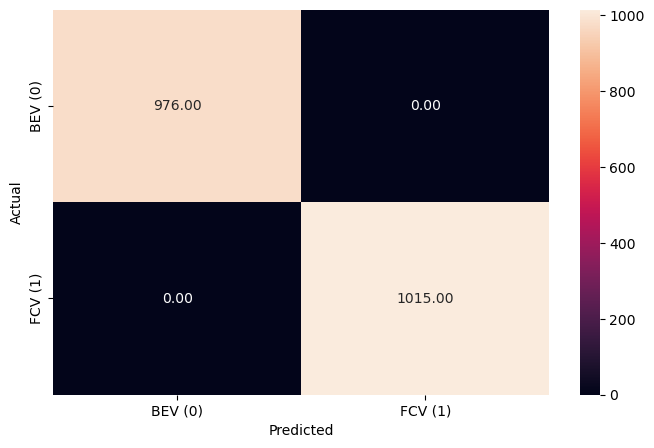

In [90]:
ovr_tuned_svm_predictions = tuned_svm.predict(X_test_scaled)
ovr_tuned_accuracy_score = accuracy_score(y_test, ovr_tuned_svm_predictions)
metrics_score(y_test, ovr_tuned_svm_predictions)

In [94]:
tuned_svm_accuracy = get_accuracy_score(tuned_svm)
tuned_svm_accuracy

[1.0, 1.0]

In [95]:
tuned_svm_recall = get_recall_score(grid)
tuned_svm_recall

D:\Anaconda\envs\mlev\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\envs\mlev\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[1.0, 1.0]

In [96]:
tuned_svm_precision = get_precision_score(grid)
tuned_svm_precision

[1.0, 1.0]

# Testing on Weaker Data

* Plotting the feature importance shows that Manufacturer and Model Year are the best features for categorizing the data.
* In order to test the value of the other features, I am going to drop the Model Year columns and rerun the model.

### However the above GridSearch results indicate that the 'rbf' kernel is the strongest in predicting the target

In [19]:
data = ml_df.copy()
data = data.drop(columns=['Model Year'])

In [20]:
# Seperate training data from target column

X = data.drop(columns=('Target'), axis = 1)
y = data['Target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [22]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Create the SVM model
svm = SVC(kernel='linear')

In [24]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [25]:
y_pred = svm.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7870416875941738

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       976
         1.0       0.80      0.77      0.79      1015

    accuracy                           0.79      1991
   macro avg       0.79      0.79      0.79      1991
weighted avg       0.79      0.79      0.79      1991



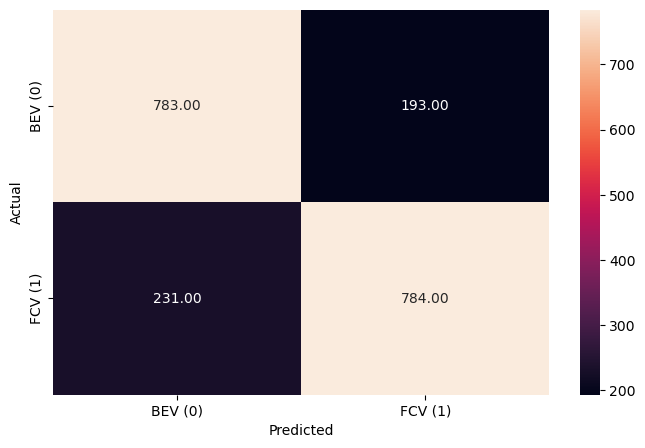

In [26]:
metrics_score(y_test, y_pred)

In [27]:
# Calculate feature importance on SVM Model

coef = svm.coef_
feature_importance = np.abs(coef)

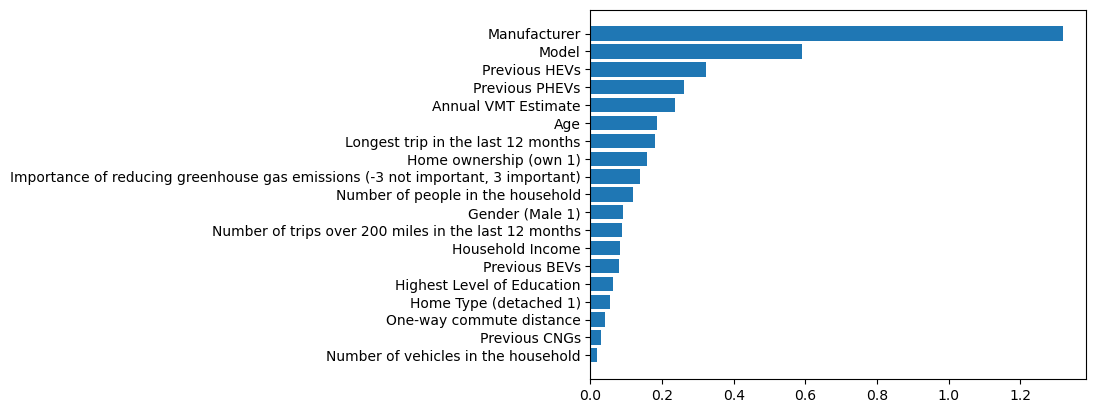

In [28]:
# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

In [29]:
param_grid = {'C': [0.1,1], 'gamma': [10,5],'kernel': ['rbf', 'linear']}

grid = GridSearchCV(svm,param_grid,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train)

print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976
         1.0       1.00      1.00      1.00      1015

    accuracy                           1.00      1991
   macro avg       1.00      1.00      1.00      1991
weighted avg       1.00      1.00      1.00      1991



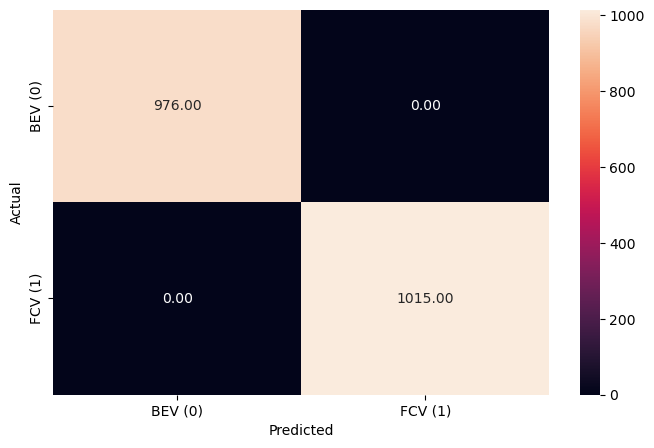

In [30]:
weak_grid_predictions = grid.predict(X_test_scaled)
metrics_score(y_test, weak_grid_predictions)

## Now the feature importance shows that Manufacturer and Model are the best features for predicting the target; so once again I will remove them to test the model's accuracy on the weaker dataset

In [31]:
data = ml_df.copy()
data = data.drop(columns=['Manufacturer', 'Model', 'Model Year'])

In [32]:
# Seperate training data from target column

X = data.drop(columns=('Target'), axis = 1)
y = data['Target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [34]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Create the SVM model
svm = SVC(kernel='linear')

In [36]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [37]:
y_pred = svm.predict(X_test_scaled)
weak_accuracy_score = accuracy_score(y_test, y_pred)
weak_accuracy_score

0.634856855851331

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63       976
         1.0       0.64      0.64      0.64      1015

    accuracy                           0.63      1991
   macro avg       0.63      0.63      0.63      1991
weighted avg       0.63      0.63      0.63      1991



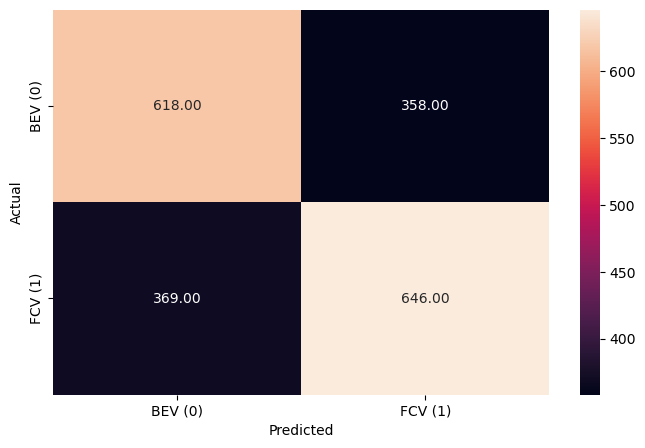

In [38]:
metrics_score(y_test, y_pred)

In [39]:
# Calculate feature importance on SVM Model

coef = svm.coef_
feature_importance = np.abs(coef)

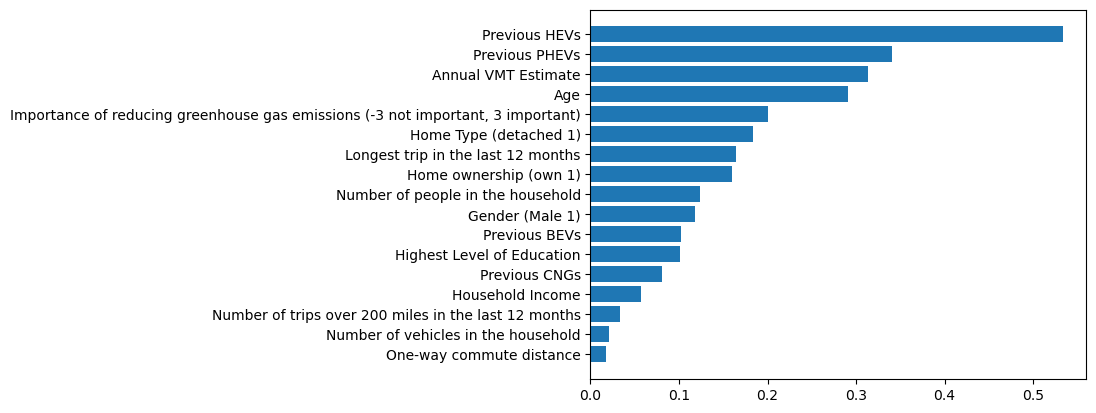

In [40]:
# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

In [41]:
param_grid = {'C': [1], 'gamma': [10, 5, 1],'kernel': ['linear', 'rbf']}

grid = GridSearchCV(svm,param_grid,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train)

print(grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976
         1.0       1.00      1.00      1.00      1015

    accuracy                           1.00      1991
   macro avg       1.00      1.00      1.00      1991
weighted avg       1.00      1.00      1.00      1991



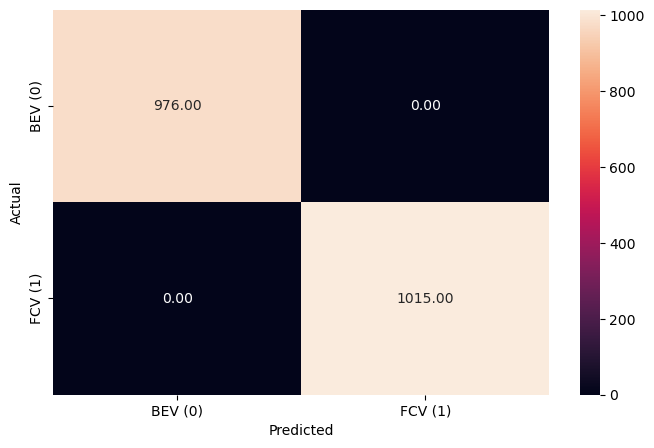

In [42]:
weak_grid_predictions = grid.predict(X_test_scaled)
weak_tuned_accuracy_score = accuracy_score(y_test, weak_grid_predictions)
metrics_score(y_test, weak_grid_predictions)

## Testing on Strongest Data

    - Since the model selects 'Manufacturer, Model, and Model Year' as the top features in predicting our target, I will run the model using only those three features to test accuracy.

In [43]:
data = ml_df.copy()

In [44]:
# Seperate training data from target column

X = data.drop(columns=('Target'), axis = 1)
X = X[['Manufacturer', 'Model', 'Model Year']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [45]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Create the SVM model
svm = SVC(kernel='linear')

In [47]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [48]:
y_pred = svm.predict(X_test_scaled)
top_accuracy_score = accuracy_score(y_test, y_pred)
top_accuracy_score

0.8066298342541437

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       976
         1.0       0.84      0.76      0.80      1015

    accuracy                           0.81      1991
   macro avg       0.81      0.81      0.81      1991
weighted avg       0.81      0.81      0.81      1991



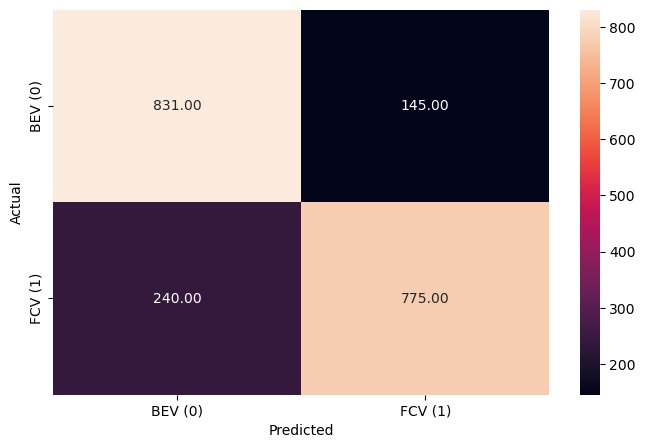

In [49]:
metrics_score(y_test, y_pred)

In [50]:
# Calculate feature importance on SVM Model

coef = svm.coef_
feature_importance = np.abs(coef)

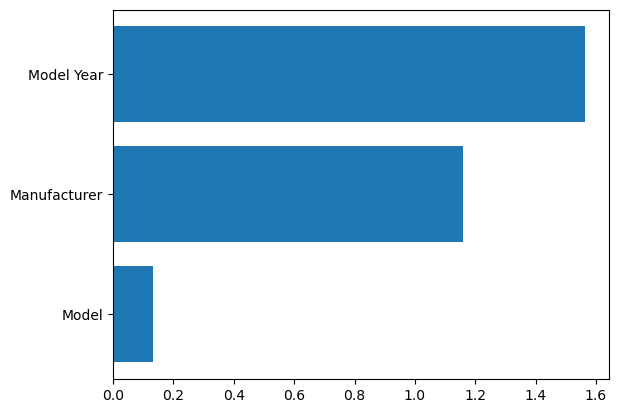

In [51]:
# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

In [52]:
param_grid = {'C': [1], 'gamma': [10, 5, 1],'kernel': ['linear', 'rbf']}

grid = GridSearchCV(svm,param_grid,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train)

print(grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976
         1.0       1.00      1.00      1.00      1015

    accuracy                           1.00      1991
   macro avg       1.00      1.00      1.00      1991
weighted avg       1.00      1.00      1.00      1991



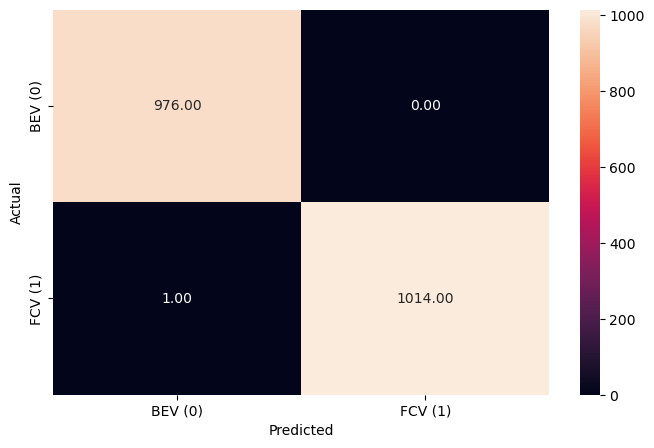

In [53]:
strong_grid_predictions = grid.predict(X_test_scaled)
strong_tuned_accuracy_score = accuracy_score(y_test, strong_grid_predictions)
metrics_score(y_test, strong_grid_predictions)

In [92]:
##  Function to calculate accuracy score
def get_accuracy_score(model):

    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train_scaled,y_train)
    test_acc = model.score(X_test_scaled,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    return c

In [97]:
def get_recall_score(model):
 
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    return a

In [93]:
def get_precision_score(model):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    return b

In [112]:


data_comparison_df = pd.DataFrame({'Data' : ['Overall Data', 'Weak Features', 'Best Features'],
                            'Accuracy' : [str(round(ovr_accuracy_score * 100, 2)) + '%',
                                            str(round(weak_accuracy_score * 100, 2)) + '%',
                                            str(round(top_accuracy_score * 100, 2)) + '%'],
                            'Tuned Accuracy' : [str(round(ovr_tuned_accuracy_score * 100, 2)) + '%',
                                                str(round(weak_tuned_accuracy_score * 100, 2)) + '%',
                                                str(round(strong_tuned_accuracy_score * 100, 2)) + '%']})
data_comparison_df

,Data,Accuracy,Tuned Accuracy
0,Overall Data,84.28%,100.0%
1,Weak Features,63.49%,100.0%
2,Best Features,80.66%,99.95%


# Ridge Classifier Model

In [114]:
ml_df = df.copy()

In [115]:
# Seperate training data from target column

X = ml_df.drop(columns=('Target'), axis = 1)
y = ml_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [116]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [117]:
rr = RidgeClassifier(alpha=1)

In [118]:
rr.fit(X_train_scaled, y_train)

RidgeClassifier(alpha=1)

In [119]:
y_pred = rr.predict(X_test_scaled)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test,
}).reset_index(drop=True)
results

,Prediction,Actual
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
1986,0.0,0.0
1987,1.0,0.0
1988,0.0,1.0
1989,1.0,1.0


In [120]:
# Evaluate the model
ovr_accuracy_score = accuracy_score(y_test, y_pred)
ovr_accuracy_score

0.8307383224510296

In [122]:
rr_accuracy = get_accuracy_score(rr)
rr_accuracy

[0.8332974370019384, 0.8307383224510296]

In [123]:
rr_recall = get_recall_score(rr)
rr_recall

[0.7701998262380538, 0.7665024630541872]

In [124]:
rr_precision = get_precision_score(rr)
rr_precision

[0.8785926660059464, 0.8861047835990888]

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       976
         1.0       0.89      0.77      0.82      1015

    accuracy                           0.83      1991
   macro avg       0.84      0.83      0.83      1991
weighted avg       0.84      0.83      0.83      1991



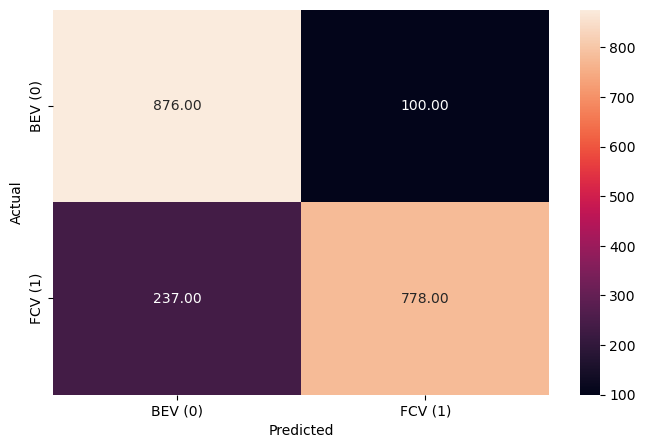

In [121]:
metrics_score(y_test, y_pred)

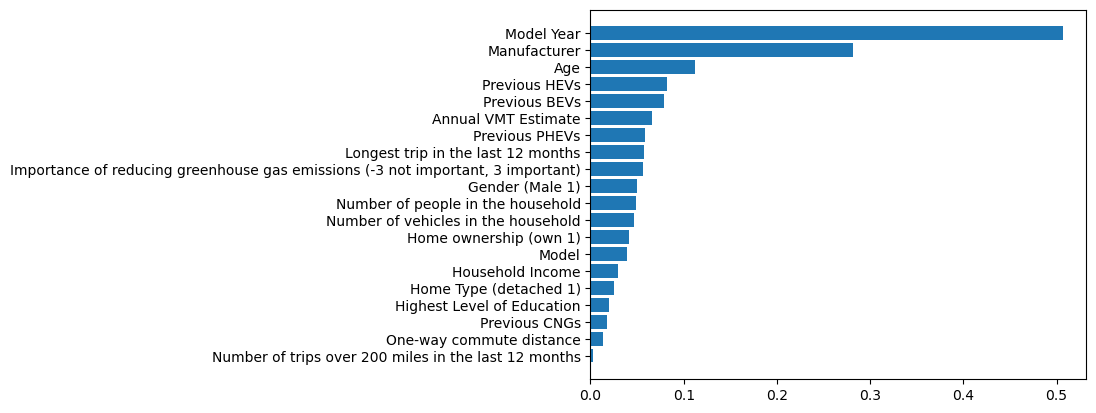

In [125]:
# Calculate feature importance on Ridge Model

coef = rr.coef_
feature_importance = np.abs(coef)

# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

## Tuning the Ridge Classifier Model

In [136]:
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1], 'fit_intercept': [True, False],'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']}

grid = GridSearchCV(rr,param_grid,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'alpha': 0.2, 'fit_intercept': False, 'solver': 'sag'}


              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       976
         1.0       0.89      0.78      0.83      1015

    accuracy                           0.84      1991
   macro avg       0.84      0.84      0.84      1991
weighted avg       0.84      0.84      0.84      1991



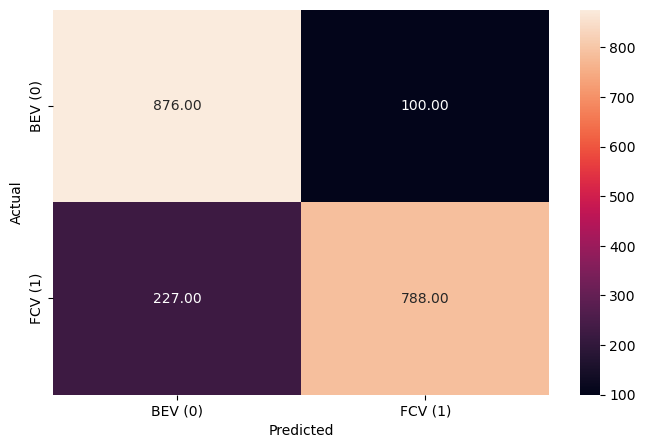

In [137]:
ovr_grid_predictions = grid.predict(X_test_scaled)
ovr_tuned_accuracy_score = accuracy_score(y_test, ovr_grid_predictions)
metrics_score(y_test, ovr_grid_predictions)

In [138]:
tuned_rr_accuracy = get_accuracy_score(grid)
tuned_rr_accuracy

[0.8363127288391127, 0.8357609241587142]

In [139]:
tuned_rr_recall = get_recall_score(grid)
tuned_rr_recall

[0.7762814943527367, 0.7763546798029557]

In [141]:
tuned_rr_precision = get_precision_score(grid)
tuned_rr_precision

[0.8794291338582677, 0.8873873873873874]

In [142]:
comparison_df = pd.DataFrame({'Model' : ['SVM', 'Tuned SVM', 'Ridge Classfier', 'Tuned Ridge Classifier'],
                              'Train_Accuracy': [svm_accuracy[0], tuned_svm_accuracy[0], rr_accuracy[0], tuned_rr_accuracy[0]],
                              'Test_Accuracy': [svm_accuracy[1], tuned_svm_accuracy[1], rr_accuracy[1], tuned_rr_accuracy[1]],
                              'Train_Recall': [svm_recall[0], tuned_svm_recall[0], rr_recall[0], tuned_rr_recall[0]],
                              'Test_Recall': [svm_recall[1], tuned_svm_recall[1], rr_recall[1], tuned_rr_recall[1]],
                              'Train_Precision': [svm_precision[0], tuned_svm_precision[0], rr_precision[0], tuned_rr_precision[0]],
                              'Test_Precision': [svm_precision[1], tuned_svm_precision[1], rr_precision[1], tuned_rr_precision[1]]})

comparison_df                              

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,SVM,0.843205,0.842793,0.828844,0.832512,0.851026,0.855263
1,Tuned SVM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Ridge Classfier,0.833297,0.830738,0.770200,0.766502,0.878593,0.886105
3,Tuned Ridge Classifier,0.836313,0.835761,0.776281,0.776355,0.879429,0.887387


In [143]:
comparison_df.to_csv('svm_rr_results.csv', index=False)